In [60]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from datetime import datetime, timezone
import plotly.graph_objects as go
%matplotlib inline

In [2]:
sightings = pd.read_pickle('sightings_add_UTC')
sightings.head(8)

Date_Time   Shape        Duration  \
0 2021-04-23 06:30:00  Circle       9 minutes   
1 2021-04-23 06:00:00  Circle         Seconds   
2 2021-04-23 06:00:00   Light       5 minutes   
3 2021-04-23 05:59:00   Light       3 minutes   
4 2021-04-23 05:58:00    Cone      >5 minutes   
5 2021-04-23 05:55:00  Sphere      10 minutes   
6 2021-04-23 05:54:00   Light       5 minutes   
7 2021-04-23 05:45:00   Light  ~10-15 minutes   

                                             Summary   Posted  \
0  Very strange   ((NUFORC Note:  Rocket launch f...  4/23/21   
1  Ball in the sky   ((NUFORC Note:  Rocket launc...  4/23/21   
2  I was driving and saw something strange in the...  4/23/21   
3  2 extremely bright lights appeared over east c...  4/23/21   
4  A cone of light coming from the sky unlike any...  4/23/21   
5  Noticed a intense light that was covering a la...  4/23/21   
6  Two bright lights one flashing with a descendi...  4/23/21   
7  Im former military and have never seen aircraf...  4/23/21   

                                         Detail_Link  \
0  http://www.nuforc.org/webreports/162/S162815.html   
1  http://www.nuforc.org/webreports/162/S162814.html   
2  http://www.nuforc.org/webreports/162/S162822.html   
3  http://www.nuforc.org/webreports/162/S162824.html   
4  http://www.nuforc.org/webreports/162/S162819.html   
5  http://www.nuforc.org/webreports/162/S162823.html   
6  http://www.nuforc.org/webreports/162/S162820.html   
7  http://www.nuforc.org/webreports/162/S162826.html   

                                      Detail_Summary  \
0  \nVery strangeI have recorded a video of this ...   
1  \nBall in the skyObject appears as a white bal...   
2  \nI was driving and saw something strange in t...   
3  \n2 extremely bright lights appeared over east...   
4  \nA cone of light coming from the sky unlike a...   
5  \nDriving on I-16 south and noticed a intense ...   
6  \nTwo bright lights one flashing with a descen...   
7  \nIm former military and have never seen aircr...   

                                 Detail_Summary_nltk Notes        Country  \
0                   strangei recorded video sighting   NaN  United States   
1  ball skyobject appears white ball vapor strewi...   NaN  United States   
2  driving saw something strange sky pulled car i...   NaN  United States   
3  2 extremely bright light appeared east coast n...   NaN  United States   
4  cone light coming sky unlike anything ever see...   NaN  United States   
5  driving i-16 south noticed intense light cover...   NaN  United States   
6  two bright light one flashing descending expan...   NaN  United States   
7  I former military never seen aircraft that.inc...   NaN  United States   

              City State                           Location        Lat  \
0       Blackshear    GA       Blackshear, GA United States  31.304430   
1         Thompson    VA         Thompson, VA United States  37.781980   
2       Vero Beach    FL       Vero Beach, FL United States  27.638850   
3  Saint Augustine    FL  Saint Augustine, FL United States  29.894690   
4           Durham    NC           Durham, NC United States  35.995420   
5       I-16 south    GA       I-16 south, GA United States  32.071949   
6          Parrish    FL          Parrish, FL United States  27.577620   
7        Davenport    FL        Davenport, FL United States  28.157990   

         Lon      timezone_str                  Time_UTC  
0 -82.240580  America/New_York 2021-04-23 10:30:00+00:00  
1 -79.974385  America/New_York 2021-04-23 10:00:00+00:00  
2 -80.393960  America/New_York 2021-04-23 10:00:00+00:00  
3 -81.314520  America/New_York 2021-04-23 09:59:00+00:00  
4 -78.896440  America/New_York 2021-04-23 09:58:00+00:00  
5 -81.223154  America/New_York 2021-04-23 09:55:00+00:00  
6 -82.425460  America/New_York 2021-04-23 09:54:00+00:00  
7 -81.603400  America/New_York 2021-04-23 09:45:00+00:00

In [3]:
sightings.dtypes

Date_Time                   datetime64[ns]
Shape                               object
Duration                            object
Summary                             object
Posted                              object
Detail_Link                         object
Detail_Summary                      object
Detail_Summary_nltk                 object
Notes                               object
Country                             object
City                                object
State                               object
Location                            object
Lat                                float64
Lon                                float64
timezone_str                        object
Time_UTC               datetime64[ns, UTC]
dtype: object

In [4]:
#correcting 1900s to 2000s issue with date column
def fix_date(x):
    if x.year > 2021:
        return datetime(x.year - 100, x.month, x.day, x.hour, x.minute, x.second, x.microsecond, tzinfo=timezone.utc)
    else:
        return x
    

In [5]:
sightings['Time_UTC']=sightings['Time_UTC'].apply(fix_date)
sightings['Time_UTC']=pd.to_datetime(sightings['Time_UTC'], utc=True)
sightings.dtypes

Date_Time                   datetime64[ns]
Shape                               object
Duration                            object
Summary                             object
Posted                              object
Detail_Link                         object
Detail_Summary                      object
Detail_Summary_nltk                 object
Notes                               object
Country                             object
City                                object
State                               object
Location                            object
Lat                                float64
Lon                                float64
timezone_str                        object
Time_UTC               datetime64[ns, UTC]
dtype: object

In [6]:
sightings['Time_UTC']

0       2021-04-23 10:30:00+00:00
1       2021-04-23 10:00:00+00:00
2       2021-04-23 10:00:00+00:00
3       2021-04-23 09:59:00+00:00
4       2021-04-23 09:58:00+00:00
                   ...           
97243                         NaT
97244                         NaT
97247                         NaT
97248                         NaT
97249                         NaT
Name: Time_UTC, Length: 61647, dtype: datetime64[ns, UTC]

In [7]:
# creating the Bag of words Model
BagOfWords = []
for s in sightings['Detail_Summary_nltk']:
    BagOfWords.append(s)

In [8]:
#Sentiment Analyzer
sia = SentimentIntensityAnalyzer()
out = sia.polarity_scores(sightings.Detail_Summary[0])
out

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [9]:
def sentiment(summary) -> float:
    """Compound has a range of -1 (negative) to +1 (positive), if 0 then neutral"""
    return sia.polarity_scores(summary)["compound"]

In [10]:
sightings['sentiment'] = sightings['Detail_Summary'].apply(sentiment)

In [11]:
sightings['sentiment']

0        0.0000
1        0.7343
2        0.9155
3        0.2230
4       -0.3075
          ...  
97243   -0.9267
97244    0.2960
97247   -0.7615
97248    0.3400
97249    0.6566
Name: sentiment, Length: 61647, dtype: float64

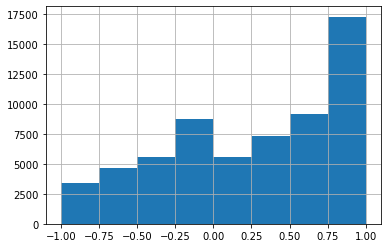

In [12]:
hist = sightings['sentiment'].hist(bins=8)

In [13]:
def objectivity(summary) -> float:
    """reports a float within the range [0.0, 1.0] where 0.0 is a very objective sentence and 1.0 is very subjective"""
    return TextBlob(summary).subjectivity

In [14]:
sightings['objectivity'] = sightings['Detail_Summary'].apply(objectivity)

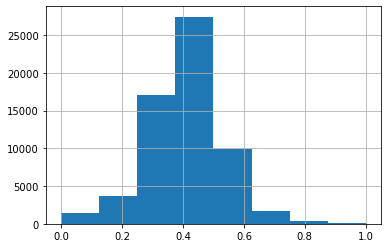

In [15]:
hist = sightings['objectivity'].hist(bins=8)

In [16]:
#save file
sightings.to_pickle('sightings_add_sentiment')

<AxesSubplot:>

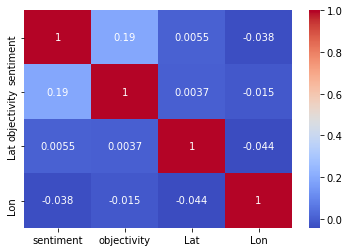

In [17]:
#load fresh file to work with
sightings_sentiment = pd.read_pickle('sightings_add_sentiment')

sns.heatmap(sightings_sentiment[['sentiment', 'objectivity', 'Lat', 'Lon']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm') 

In [20]:
#visualize data

ufo_df = sightings_sentiment[['sentiment', 'objectivity', 'Lat', 'Lon', 'Time_UTC', 'City', 'State', 'Country', 'Shape']].copy()
ufo_df = ufo_df[ufo_df['Country'] == 'United States']
ufo_df.dropna(how='any', inplace=True)

# Set x axis, group y axis
ufo_df['year'] = ufo_df['Time_UTC'].dt.year
ufo_df['day'] = ufo_df['Time_UTC'].dt.dayofyear


In [21]:
ufo_df.sample(8)

sentiment  objectivity       Lat        Lon                  Time_UTC  \
35040     0.4215     0.281944  43.04565  -72.66713 2015-02-10 12:35:00+00:00   
80375    -0.8026     0.556760  29.91666  -90.06569 2008-03-03 05:30:00+00:00   
59579     0.5754     0.628000  30.33147  -81.65622 2012-02-19 05:15:00+00:00   
94789    -0.7633     0.354870  30.46542  -86.55522 1978-03-01 16:00:00+00:00   
10476    -0.3612     0.283697  33.60386  -86.11953 2019-09-28 14:30:00+00:00   
19085     0.9017     0.539206  39.74001 -104.99202 2017-10-17 07:00:00+00:00   
78579     0.8402     0.588889  37.06521  -88.10405 2008-07-09 02:15:00+00:00   
9552     -0.9131     0.758333  42.49532  -82.88891 2019-11-06 06:30:00+00:00   

                     City State        Country     Shape  year  day  
35040           Townshend    SC  United States     Cigar  2015   41  
80375              Gretna    LA  United States     Light  2008   63  
59579        Jacksonville    FL  United States    Sphere  2012   50  
94789           Eglin AFB    FL  United States    Circle  1978   60  
10476             Lincoln    AL  United States     Other  2019  271  
19085              Denver    CO  United States  Teardrop  2017  290  
78579             Kuttawa    KY  United States     Light  2008  191  
9552   Saint Clair Shores    MI  United States   Unknown  2019  310

In [22]:
ufo_df[ufo_df.year>2021]

Empty DataFrame
Columns: [sentiment, objectivity, Lat, Lon, Time_UTC, City, State, Country, Shape, year, day]
Index: []

In [23]:
sightings.loc[[96009]]

Date_Time   Shape    Duration  \
96009 2068-11-15 17:30:00  Sphere  10 minutes   

                                                 Summary   Posted  \
96009  It was November 1968 in Vernon Connecticut. I ...  1/31/20   

                                             Detail_Link  \
96009  http://www.nuforc.org/webreports/152/S152907.html   

                                          Detail_Summary  \
96009  \nIt was November 1968 in Vernon Connecticut. ...   

                                     Detail_Summary_nltk Notes        Country  \
96009  november 1968 vernon connecticut . 13 ... rece...   NaN  United States   

         City State                  Location       Lat       Lon  \
96009  Vernon    CT  Vernon, CT United States  41.86753 -72.44806   

           timezone_str                  Time_UTC  sentiment  objectivity  
96009  America/New_York 1968-11-15 22:30:00+00:00     -0.816     0.366799

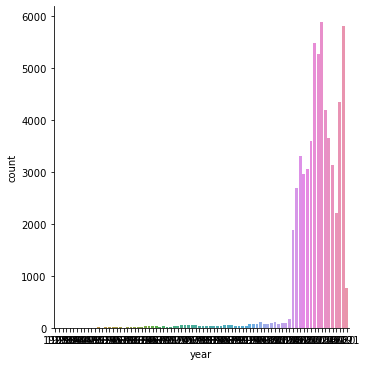

In [33]:
sns.catplot(x="year", kind = 'count', data = ufo_df)

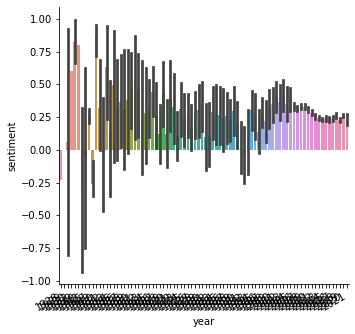

In [40]:
g = sns.catplot(x="year", y="sentiment", estimator= np.mean ,kind="bar", data=ufo_df)
g.fig.autofmt_xdate()

In [54]:
#define borders for map
#BBox = ((ufo_df.Lon.min(),   ufo_df.Lon.max(), ufo_df.Lat.min(), ufo_df.Lat.max()))

BBox = (-125.859, -92.681, 25.562, 49.781)

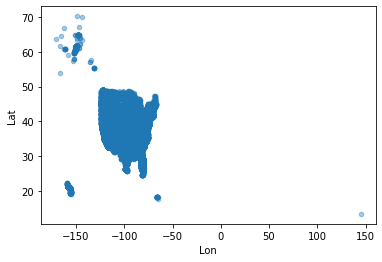

In [55]:
ufo_df.plot(kind="scatter", x="Lon", y="Lat", alpha=0.4)
plt.show()

In [56]:
#ruh_m = plt.imread('map2.png')

In [59]:
#fig, ax = plt.subplots(figsize = (8,7))
#ax.scatter(x=ufo_df.Lon, y=ufo_df.Lat, zorder=1, alpha= 0.2, c='b', s=10)

#ax.set_title('UFO Sightings in US')
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [72]:
fig = go.Figure(data=go.Scattergeo(
        lon = ufo_df['Lon'],
        lat = ufo_df['Lat'],
        text = ufo_df['Shape'],
        mode = 'markers',
        marker = dict(
                    color = ufo_df['sentiment'],
                    reversescale = True,
                    opacity = 0.7,
                    size = 2,
                    colorbar = dict(
                                titleside = "right",
                                outlinecolor = "rgba(68, 68, 68, 0)",
                                ticks = "outside",
                                showticksuffix = "last",
                                dtick = 0.1
        ))))

fig.update_layout(
        title = 'UFO sightings in the US by sentiment',
        geo_scope='usa',
    )
fig.show()